# FETAL HEALTH CLASSIFICATION USING SKLEARN
Hello, everyone! In this my second public notebook we will learn how to use **sklearn python library** to make some classification tasks. We will explore some well-known classificators to make predictions. You will learn some basic classificators which you can find in this library and which you will be able to use in your future studies. 

In this case, we will use dataset ["Fetal Health Classification"](https://www.kaggle.com/andrewmvd/fetal-health-classification) as an example. It can be used to classify fetal health in order to prevent child and maternal mortality. 

**This article has a lot of explanations, so it will be very helpful for beginners.**


# !!!DISCLAIMER!!!
This kaggle article is made only in educational purposes. It can't be used as only one right and sure way to check mother and child health problems. If you have some questions, please, visit your health doctor in order to get medical treatment!



So, let's start!

#  1. SKLEARN PYTHON LIBRARY
[This](https://scikit-learn.org/stable/) module has simple and efficient tools for predictive data analysis. It has some built-in classifiers which we will use to make predictions. 
Moreover, [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) you can find some useful information about classification methods available in this library.

# 2. OTHER LIBRARIES
Then, let think, which other libraries we should use to make our project right:
1. [Pandas](https://pandas.pydata.org/) - for data manipulation and analysis.
2. [NumPy](https://numpy.org/) - for matrices and arrays, has a lot of math functions.
3. [Matplotlib](https://matplotlib.org/) - for visualizations, like plots.
4. [Pickle](https://docs.python.org/3/library/pickle.html) - this one is used or serializing and de-serializing a Python object structure. We will save trained model with pickle.

In [ ]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#CLASSIFIERS FOR TRAINING
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# 3. READ DATA
So, now, we can get data from our dataset, using Pandas fuction **read_csv()**, because our data was in .csv format. Function **head()** returns top 5 records from your dataset, here it is used just to check that we read our data correctly. 

In [ ]:
data = pd.read_csv("../input/fetal-health-classification/fetal_health.csv") 
print("♦ LOOK AND CHECK DATA:")
print(data.head())
print()
print("♦ DATASET LENGTH = ", len(data))

So, as we can see, we have 22 columns here (21 columns are our input data and the last one column will be used as prediction column). Also, it has 2126 rows, it is 2126 measurements extracted from cardiotocograms and classified by expert obstetricians into 3 categories:
1. Normal
2. Suspect
3. Pathological

After that, we can print all our dataset columns for future use: 

In [ ]:
cols = data.columns
print(cols)

# 4. ANALYZE DATA
One of the most important things is to understand data which you work with. Here we will use some well-known methods for easier understanding of our data.

For all dataset columns we will find some statistical information, like: Mean, Median, Mode (a.k.a [The Three M's of Statistics](https://www.dummies.com/education/math/pre-algebra/the-three-types-of-average-median-mode-and-mean/)), [Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation) and [Correlation](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression) using Pandas functions.

# 4.1. mean
In the code below we used **mean()** Pandas function with axis=0 parameter. It is the the axis to iterate over while searching.
It means that you want to find mean across all your indexes (in our case indexes are the names of the colunms). So, it finds statistical data from up to down, via all rows for a column.
If you will write axis=1 you will find statistical data from left to right, via all columns, for a row.
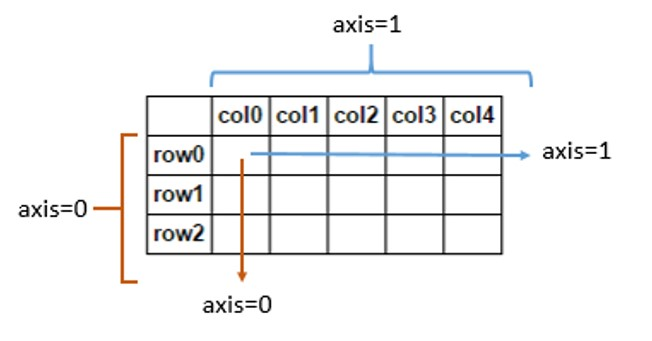

In [ ]:
mean = data.mean(axis=0)
print(mean)

# 4.2. median
Here we will use **median()** Pandas function.

In [ ]:
median = data.median(axis=0)
print(median)

# 4.3. mode
Here we will use **mode()** Pandas function.

In [ ]:
mode = data.mode(axis=0)
print(mode)

# 4.4. standart deviation
Here we will use **std()** Pandas function.

In [ ]:
std = data.std(axis=0)
print(std)

# 4.5. correlation
Pandas **corrwith()** is [used](https://www.geeksforgeeks.org/python-pandas-dataframe-corrwith/) to compute pairwise correlation between rows or columns of two DataFrame objects.


In [ ]:
print(data.corrwith(data["fetal_health"]))

# 5. VISUALIZE DATA
For easier understanding data we can build some plots. In this example, we will check how many records we have in each class. For this task we can use built-in plots to Pandas library. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) you can read more about them.

1. Firstly, we set the size of our picture for our consideration, set the title of the plot and name the OX and OY axises. 
2. Then, we should count total sum of records for each class, in our case, classes are named as 1.0, 2.0, 3.0 via **value_counts()**. For exact counts for each class we can easily print our result to the screen.
3. Build a bar chart for these classes.
4. Turn on the grid via **grid()** and show our plot via **show()**

In [ ]:
#STEP-1
plt.figure(figsize=(18,5))
plt.title('FETAL HEALTH CLASSES')
plt.xlabel('Fetal health class')
plt.ylabel('count')

#STEP-2
value_counts = data["fetal_health"].value_counts()
print(value_counts) 

#STEP-3
value_counts.plot.bar()

#STEP-4
plt.grid()
plt.show()

# 6. NORMALIZE DATA
1. It is necessary to normalize data before making some classification tasks. Here we will normalize it in a range from 0 to 1, it is one of the most popular normalization intervals. So, we will initialize it.
2. Output column **"fetal_health"** is the last column and it shouldn't be normalized, because it has target values. So, we will remember and save this all column values in temporary variable.
3. As the result, we will get data numpy array, which will be normalized. 
4. But, for our future work it is easier to store data in the Pandas dataframe, so, we will convert normalized numpy array **norm_data** back to dataframe. The columns in our dataframe will be the same as we had earlier, their names were stored in a variable **cols** (see "3. Read Data")
5. Then, we should change our normalized column **"fetal_health"** with non-normalized colum **"fetal_health"**, saved in temporary variable (in the step 2).
6. Also, we can check and look our results.

In [ ]:
#STEP-1
scaler = MinMaxScaler(feature_range=(0, 1))
#STEP-2
temp = data["fetal_health"]
#STEP-3
norm_data = scaler.fit_transform(data)
#STEP-4
data = pd.DataFrame(data=norm_data, columns=cols)
#STEP-5
data["fetal_health"] = temp
#STEP-6
print(data.head())

# 7. SPLIT DATASET INTO TRAIN AND TEST DATA
So, here we will divide our dataset into two parts (for model training and validation). Let it will be 70%:30% respectively. You can also try it with another ratio, like 60%:40%, 80%:20%, 90%:10% and so on. 
1. Firlstly, we should initalize our random variable. It will be used to generate random train samples after each code run. 
2. As I said earier, train set will consist of 70% of initial dataset. We will use **sample()** function. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) you can read more about it.
3. As the result, we will have 2 dataframes (train and validation), but records in them will have old ID indexes, as they had in the initial dataset. To reset indexes in train and val sets we will use **reset_index()** function. 
4. Then, we can check and look results.

In [ ]:
#STEP-1
rng = RandomState()

#STEP-2
train = data.sample(frac=0.7, random_state=rng)
val = data.loc[~data.index.isin(train.index)]

#STEP-3
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

#STEP-4
print("♦ TRAIN SET:")
print(train.head())
print()
print("♦ VALIDATION SET:")
print(val.head())

# 8. FINAL PREPARATIONS
So, here we will make some last steps before making and training our model.
1. We know that the last column in our target output column (Y) and all columns before are input columns (X). So, we can store in variables their names in order to have accses to them in future.
2. So, we should remember in variables our columns with input variables and column with output variable. We work with our train set, because it is preparations are made for training.
3. For safety, we will copy them to new variables.
4. Look and check X and Y train values.
5. We should repeat step 2 for validation set, because in future we should check our model performance on this set.
6. We should repeat step 3 for validation set.
7. We should repeat step 4 for validation set.

In [ ]:
#STEP-1
x_columns = cols[:-1]
y_column = cols[-1]

#STEP-2
x_raw_train = train[x_columns]
y_raw_train = train[y_column]

#STEP-3
X_train = x_raw_train.copy()
Y_train = y_raw_train.copy()

#STEP-4
print("♦ X_TRAIN: ")
print(X_train.head())
print()
print("♦ Y_TRAIN: ")
print(Y_train.head())
print()

#STEP-5
x_raw_val = val[x_columns]
y_raw_val = val[y_column]

#STEP-6
X_val = x_raw_val.copy()
Y_val = y_raw_val.copy()

#STEP-7
print("♦ X_VAL: ")
print(X_val.head())
print()
print("♦ Y_VAL: ")
print(Y_val.head())

# 9. CLASSIFIERS INFO
Here we will use learn a little bit about built-in sklearn classifiers for our dataset. Below you can see a little description about them. Also, I added some interesting articles. You can read them for easier understanding of classfiers' work. 

# 9.1. k nearest neighbors
K-Nearest Neighbors, or KNN for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. **Sourses-to-read:** [article-1 with illustrations](https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55), [arcticle-2](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).
# 9.2. support vector machine  
Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection. **Sourses-to-read:** [article-1](https://www.freecodecamp.org/news/svm-machine-learning-tutorial-what-is-the-support-vector-machine-algorithm-explained-with-code-examples/), [article-2](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/), [article-3](https://en.wikipedia.org/wiki/Support-vector_machine).
# 9.3. decision tree
Decision Tree Analysis is a general, predictive modelling tool that has applications spanning a number of different areas. **Sourses-to-read:** [article-1](https://www.geeksforgeeks.org/decision-tree-introduction-example/), [arcicle-2](https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/), [article-3](https://www.edureka.co/blog/decision-trees/).
# 9.4. random forest
Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object. **Sourses-to-read:** [article-1](https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1), [arcicle-2](https://towardsdatascience.com/understanding-random-forest-58381e0602d2), [article-3](https://en.wikipedia.org/wiki/Random_forest).
# 9.5. adaboost
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. **Sourses-to-read:** [article-1](https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe), [arcicle-2](https://en.wikipedia.org/wiki/AdaBoost).
# 9.6. gradient boosting
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. **Sourses-to-read:** [article-1](https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/), [arcicle-2](https://en.wikipedia.org/wiki/Gradient_boosting).
# 9.7. gaussian naive bayes
Can perform online updates to model parameters via partial_fit. **Sourse-to-read:** [article-1](http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf).
# 9.8. linear discriminant analysis
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions, using the transform method. **Sourse-to-read:** [article-1](https://scikit-learn.org/stable/modules/lda_qda.html).
# 9.9. quadratic discriminant analysis
A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class. **Sourse-to-read:** [article-1](https://scikit-learn.org/stable/modules/lda_qda.html).
# 9.10. logistic regression
Logistic Regression (aka logit, MaxEnt) classifier. In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.) **Sourse-to-read:** [article-1](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html).

# 10. TRAIN & VALIDATE, SAVE & LOAD MODELS
So, this is our important part of the article. Here we will implement our main stage of our article.
1. As we going to to same operations for each classfier (learn and predict, save and load model), it will be eassier to run a loop for all these classfiers. So, they will be in our list.
2. Also, we should have a special place, were we will be store information about classifer and its accuracy for future work with it. I think, that it will be easier to have a dictionary, where we will have **"key:value"** as **"classifier:accuracy"**.
3. So, here we go into the loop for each classifier that we have.
4. Then we get our classifier **fit()** function adjusts weights according to data values so that better accuracy can be achieved. It is our learning stage.
5. In this step make prediction about our trained model with **predict()**, for this task we use validation X set, and also we should know the accuracy of our learned model with **accuracy_score()**, and we count accuracy using validation set.
6. Here we will get the name of classifier, because it will be our dictionary key, so we need it.
7. Also, we should save accuracy results to our dictionary, made in the step-2.
8. For future use, we can easily save our model, using **pickle**.
9. In this step we can load our model and see its score with **score()** function. 
10. We can check and look the accurracy of the trained model. So, we print it to the screen. Also, we can print the accuracy of loaded model. And it will same as it was found in the step-5. For better understanding, we will print it it the fashionable format: {:<30} means left-aligned with width 30. Also, {:>12} means right-aligned with width 12. 

In [ ]:
#STEP-1
all_classifers = [
    KNeighborsClassifier(3),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

#STEP-2
all_acc = {}

#STEP-3
for classifier in all_classifers:
    #STEP-4
    model = classifier
    model.fit(X_train, Y_train)
    #STEP-5
    model_pred = model.predict(X_val)
    model_acc = accuracy_score(Y_val, model_pred)
    #STEP-6
    classfier_name = classifier.__class__.__name__
    #STEP-7
    all_acc[classfier_name] = model_acc
    #STEP-8
    filename = classfier_name+'_model.pickle'
    pickle.dump(model, open(filename, 'wb'))  
    #STEP-9
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.score(X_val, Y_val)     
    #STEP-10
    print("♦ {:<30} = {:<12} {:>25} = {:>12}".format(classfier_name, model_acc, 'loaded pickle model', result))

# 11. VIZUALIZE PERFORMANCE RESULTS
In the previous stage we have found all accuracies for all trained models. Now it is time to think, which is the best one, which has the highest accuracy. For better understanding we can build a bar chart, sorted in descending order.
1. Firstly, we should rewrite our dictionary in descending order.
2. Also, we can find keys and values from the dictionary.
3. We set the figure size, name OX  and OY, set the title for our plot. I decided to make green bar chart, so the color is "g", "g" stands for green.
4. Names of all classifiers are too long. We can rotate them. They will be laying vertically.
5. We set the grid and build the plot.

In [ ]:
#STEP-1
all_acc = dict(sorted(all_acc.items(), key=lambda item: item[1], reverse=True))

#STEP-2
keys = all_acc.keys()
values = all_acc.values()

#STEP-3
plt.figure(figsize=(10,5))
plt.title('ACCURCY OF CLASSIFIERS')
plt.xlabel('classifiers')
plt.ylabel('accuracy')
plt.bar(keys, values, color="g")

#STEP-4
plt.xticks(rotation=90)

#STEP-5
plt.grid()
plt.show()

So, as we can see, the first one was the best in this task!

# 12. CONCLUSION
Thank you so much for reading my new article! I hope, it was interesting and you liked it! 

Here you can read my previous Kaggle Notebook: [Retail Trade Report Department Stores (LSTM)](https://www.kaggle.com/maricinnamon/retail-trade-report-department-stores-lstm).